# 🍷 "The Hunt for Lord Vinum's Elixir Wine" 🍷

## Backdrop

In the whimsical land of Enchanted Vineyards, legend speaks of an 'Elixir Wine' - a drink concocted by the fabled vintner, Lord Vinum, that allows anyone who drinks it to commune with nature. Amid the vast vineyards, this rare elixir is concealed within bottles of regular wines. Can you distinguish the Elixir Wine from the Regular Wine?

## Objective
 
As aspiring wine enthusiasts, your mission is to use the ancient wine scrolls to decipher which of the two varieties conceals the elixir. Sip, savor, and let the data guide you!

**Step 1: Unfurl the Ancient Wine Scrolls**:

In [1]:
from sklearn import datasets
import pandas as pd

# The age-old Wine Scroll that holds secrets of the wines
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine_type'] = [0 if i == 0 else 1 for i in wine.target]  # 0: Regular Wine, 1: Elixir Wine

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Step 2: Prepare the Tasting Session**:

Set aside some wines for training and some for tasting and validation.

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('wine_type', axis=1)
y = df['wine_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

*Practical Tip: Always keep a portion of your wine bottles (data) untouched! The `train_test_split` function from scikit-learn is your go-to tool here.*

**Step 3: Conjure the Wine Diviner**:

Use the diviner's mystical energies to predict the elusive Elixir Wine. 

In [3]:
from sklearn.linear_model import LogisticRegression

diviner = LogisticRegression(max_iter=10000)
diviner.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

*Practical Tip: Use a `LogisticRegression` model from scikit learn*

**Step 4: Taste & Tell**:

Let the diviner predict which wines from your tasting set are the Elixir Wines.

In [4]:
y_pred = diviner.predict(X_test)

*Practical Tip: Your diviner's predictions can be stored in a list or an array, like y_pred.*

**Step 5: Seek Guidance from the Grapevine**:

Validate the diviner's predictions using ancient metrics.

Grapevine's Whispers: 
Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity): 1.00
Specificity: 1.00


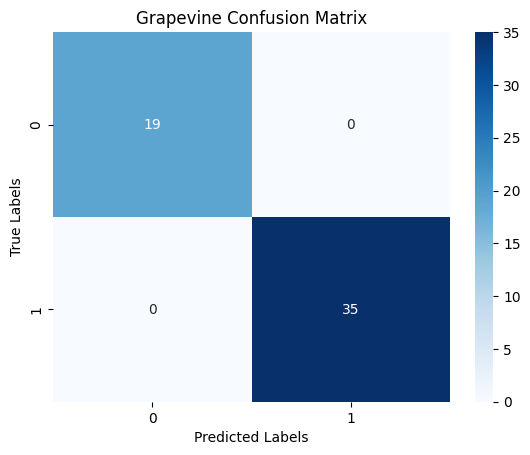

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ancient Vine Metrics
print(f"Grapevine's Whispers: \nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred):.2f}")

# Specificity is calculated as the True Negatives divided by the sum of True Negatives and False Positives
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# Visualizing the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Grapevine Confusion Matrix')
plt.show()

*Practical Tip: Use the `seaborn` library to visually display the confusion matrix for clearer insights!*

**Step 6: Grapevine’s Vision: The Enchanted ROC Curve**:

Behold the mystical chart that shows the diviner's power to discriminate between Regular and Elixir Wines.

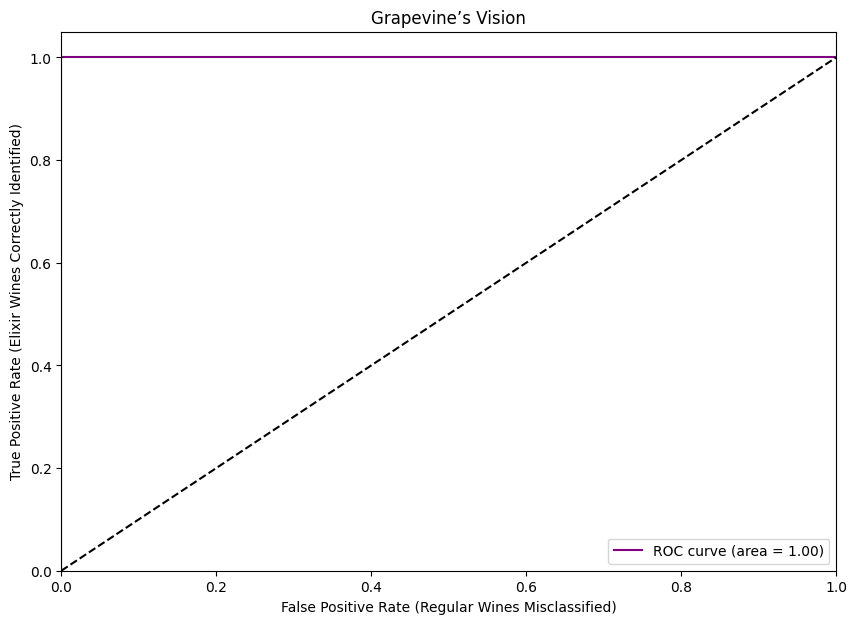

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate probabilities
y_pred_proba = diviner.predict_proba(X_test)[:, 1]

# The grapevine's enchanted ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='purple', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Regular Wines Misclassified)')
plt.ylabel('True Positive Rate (Elixir Wines Correctly Identified)')
plt.title('Grapevine’s Vision')
plt.legend(loc="lower right")
plt.show()

Practical Tip: Adjust the colors and style of the ROC curve to make it even more enchanting!

**Quest for Students**:

- The grapevine whispers of other ancient methods like the 'Berry Chant' and 'Barrel Rumble' (Decision Trees and SVMs). Try them out!
- Adjust the Wine Diviner's vision by tinkering with probability thresholds. Ensure you don’t misidentify the Elixir Wine, for its taste is said to be...divine!

---

May your senses be sharp, and the Elixir Wine reveal its secrets to you! 🍇🍷🍾🔮